<font size="5">Importing Libaries</font>

In [1]:
import pathlib
import splitfolders
from keras.preprocessing.image import ImageDataGenerator
import cv2
import os

<font size="5">Preprocessing</font>

In [2]:
data_bs = './data/'
data_bs = pathlib.Path(data_bs)
data_bs

WindowsPath('data')

In [3]:
splitfolders.ratio(data_bs, output='Imgs/', seed=123, ratio=(0.7, 0.15, 0.15), group_prefix=None)

Copying files: 7023 files [00:10, 656.91 files/s]


<font size="5">Creating train_ds, test_ds and val_ds files</font>

In [ ]:
<font size="5">Creating train_ds, test_ds and val_ds files</font>

In [4]:
batch_size = 32
img_height, img_width = 32, 32
input_shape = (img_height, img_width, 1)

datagen = ImageDataGenerator(rescale=1.0 / 255)

train_ds = datagen.flow_from_directory('Imgs/train/', target_size=(img_height, img_width), subset='training', class_mode='categorical',color_mode="grayscale", batch_size=batch_size)

test_ds = datagen.flow_from_directory('Imgs/test/', target_size=(img_height, img_width), shuffle=False, class_mode='categorical',color_mode="grayscale", batch_size=batch_size)

val_ds = datagen.flow_from_directory('Imgs/val/', target_size=(img_height, img_width), shuffle=False, class_mode='categorical',color_mode="grayscale", batch_size=batch_size)

Found 4914 images belonging to 4 classes.
Found 1057 images belonging to 4 classes.
Found 1052 images belonging to 4 classes.


<font size="5">Importing Libaries</font>

In [5]:
# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pathlib, os, random

# Import TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

<font size="5">Creating Models</font>

In [6]:
model1 = Sequential()

model1.add(Conv2D(32,(3,3), input_shape=input_shape, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(32,(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(units= 252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=4, activation='softmax'))

In [7]:
model1.compile(optimizer="adam", loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [8]:
model2 = Sequential()

model2.add(Conv2D(32,(3,3), input_shape=input_shape, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32,(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32,(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(units= 252, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=252, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=252, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=4, activation='softmax'))

In [9]:
model2.compile(optimizer="adam", loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [10]:
model3 = Sequential()

model3.add(Conv2D(32,(3,3), input_shape=input_shape, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(32,(3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())

model3.add(Dense(units= 252, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=252, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=4, activation='softmax'))

In [11]:
model3.compile(optimizer="adam", loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

<font size="5">Creating Learning Rate Function</font>

In [12]:
lr = 0.01
def learning_rate(epoch):
    global lr
    if epoch>8:
        return lr*.1
    else:
        return lr

<font size="5">Fitting Model</font>

In [13]:
results1 = model1.fit(train_ds,epochs=50,validation_data=val_ds,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)
                                                                                        ,tf.keras.callbacks.LearningRateScheduler(learning_rate)])

Epoch 1/50
154/154 [==============================] - 35s 203ms/step - loss: 1.2378 - categorical_accuracy: 0.6508 - val_loss: 2.6397 - val_categorical_accuracy: 0.3375 - lr: 0.0100
Epoch 2/50
154/154 [==============================] - 11s 72ms/step - loss: 0.6613 - categorical_accuracy: 0.7387 - val_loss: 1.0310 - val_categorical_accuracy: 0.5675 - lr: 0.0100
Epoch 3/50
154/154 [==============================] - 10s 64ms/step - loss: 0.5770 - categorical_accuracy: 0.7837 - val_loss: 0.6008 - val_categorical_accuracy: 0.7576 - lr: 0.0100
Epoch 4/50
154/154 [==============================] - 10s 65ms/step - loss: 0.4984 - categorical_accuracy: 0.8097 - val_loss: 0.6941 - val_categorical_accuracy: 0.7319 - lr: 0.0100
Epoch 5/50
154/154 [==============================] - 10s 64ms/step - loss: 0.4518 - categorical_accuracy: 0.8431 - val_loss: 0.4631 - val_categorical_accuracy: 0.7956 - lr: 0.0100
Epoch 6/50
154/154 [==============================] - 10s 64ms/step - loss: 0.4295 - categoric

In [14]:
results2 = model2.fit(train_ds,epochs=50,validation_data=val_ds,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)
                                                                                        ,tf.keras.callbacks.LearningRateScheduler(learning_rate)])

Epoch 1/50
154/154 [==============================] - 12s 68ms/step - loss: 0.9664 - categorical_accuracy: 0.6394 - val_loss: 1.7089 - val_categorical_accuracy: 0.2719 - lr: 0.0100
Epoch 2/50
154/154 [==============================] - 10s 63ms/step - loss: 0.7228 - categorical_accuracy: 0.7316 - val_loss: 1.3462 - val_categorical_accuracy: 0.6093 - lr: 0.0100
Epoch 3/50
154/154 [==============================] - 10s 64ms/step - loss: 0.5896 - categorical_accuracy: 0.7825 - val_loss: 0.7176 - val_categorical_accuracy: 0.7367 - lr: 0.0100
Epoch 4/50
154/154 [==============================] - 10s 64ms/step - loss: 0.5268 - categorical_accuracy: 0.8057 - val_loss: 0.7340 - val_categorical_accuracy: 0.6949 - lr: 0.0100
Epoch 5/50
154/154 [==============================] - 10s 66ms/step - loss: 0.4830 - categorical_accuracy: 0.8221 - val_loss: 0.5419 - val_categorical_accuracy: 0.8099 - lr: 0.0100
Epoch 6/50
154/154 [==============================] - 11s 72ms/step - loss: 0.4125 - categorica

In [15]:
results3 = model3.fit(train_ds,epochs=50,validation_data=val_ds,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)
                                                                                        ,tf.keras.callbacks.LearningRateScheduler(learning_rate)])

Epoch 1/50
154/154 [==============================] - 11s 66ms/step - loss: 0.8366 - categorical_accuracy: 0.6838 - val_loss: 5.2637 - val_categorical_accuracy: 0.2852 - lr: 0.0100
Epoch 2/50
154/154 [==============================] - 9s 61ms/step - loss: 0.5643 - categorical_accuracy: 0.7814 - val_loss: 1.7793 - val_categorical_accuracy: 0.4591 - lr: 0.0100
Epoch 3/50
154/154 [==============================] - 9s 61ms/step - loss: 0.4738 - categorical_accuracy: 0.8248 - val_loss: 1.2135 - val_categorical_accuracy: 0.6255 - lr: 0.0100
Epoch 4/50
154/154 [==============================] - 10s 66ms/step - loss: 0.3965 - categorical_accuracy: 0.8580 - val_loss: 0.4577 - val_categorical_accuracy: 0.8603 - lr: 0.0100
Epoch 5/50
154/154 [==============================] - 10s 65ms/step - loss: 0.3393 - categorical_accuracy: 0.8746 - val_loss: 0.4020 - val_categorical_accuracy: 0.8337 - lr: 0.0100
Epoch 6/50
154/154 [==============================] - 10s 63ms/step - loss: 0.2859 - categorical_

<font size="5">Plotting Metrices</font>

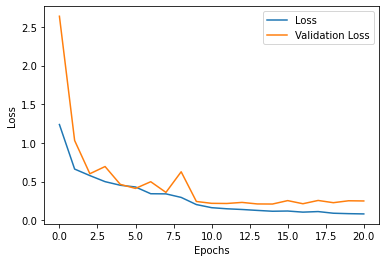

In [16]:
plt.plot(results1.history["loss"], label="Loss")

# Plot the the validation loss
plt.plot(results1.history["val_loss"], label="Validation Loss")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

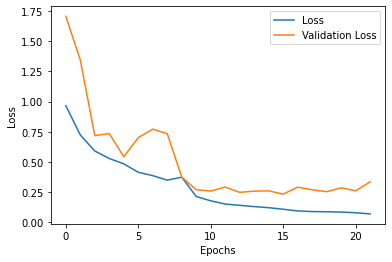

In [17]:
plt.plot(results2.history["loss"], label="Loss")

# Plot the the validation loss
plt.plot(results2.history["val_loss"], label="Validation Loss")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

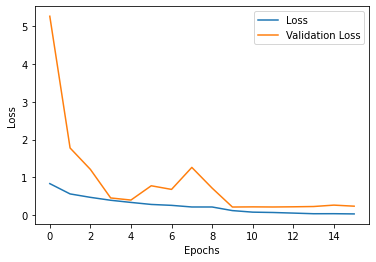

In [18]:
plt.plot(results3.history["loss"], label="Loss")

# Plot the the validation loss
plt.plot(results3.history["val_loss"], label="Validation Loss")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

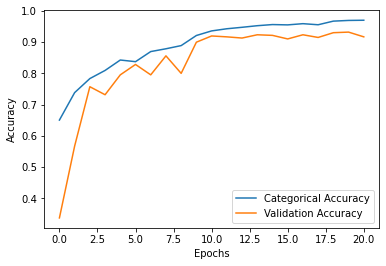

In [19]:
# Plot the the training accuracy
plt.plot(results1.history["categorical_accuracy"], label="Categorical Accuracy")

# Plot the the validation accuracy
plt.plot(results1.history["val_categorical_accuracy"], label="Validation Accuracy")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

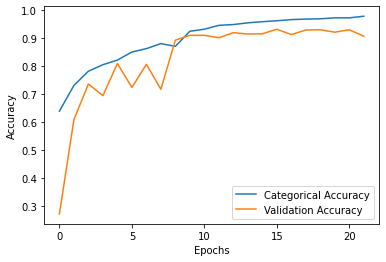

In [20]:
# Plot the the training accuracy
plt.plot(results2.history["categorical_accuracy"], label="Categorical Accuracy")

# Plot the the validation accuracy
plt.plot(results2.history["val_categorical_accuracy"], label="Validation Accuracy")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

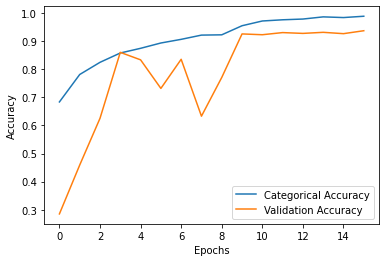

In [21]:
# Plot the the training accuracy
plt.plot(results3.history["categorical_accuracy"], label="Categorical Accuracy")

# Plot the the validation accuracy
plt.plot(results3.history["val_categorical_accuracy"], label="Validation Accuracy")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

<font size="5">Testing Model</font>

In [22]:
# Evaluate the performance
model1.evaluate(test_ds)

34/34 [==============================] - 5s 156ms/step - loss: 0.2199 - categorical_accuracy: 0.9300


[0.21993359923362732, 0.9299905300140381]

In [23]:
# Evaluate the performance
model2.evaluate(test_ds)

34/34 [==============================] - 2s 54ms/step - loss: 0.3200 - categorical_accuracy: 0.9205


[0.32003507018089294, 0.9205297827720642]

In [24]:
# Evaluate the performance
model3.evaluate(test_ds)

34/34 [==============================] - 2s 55ms/step - loss: 0.1991 - categorical_accuracy: 0.9461


[0.19911420345306396, 0.9460737705230713]